Installing and importing the library

In [1]:
import sys
!{sys.executable} -m pip install ../. --quiet --user #installation of library in local enviorment
from pyRN import pyRN

Initialization of a example network

In [2]:
file="../networks/rn_test.txt"
RN = pyRN.setFromText(file)
# RN=pyRN.setRandomgeneratedWithInflow()

Calculation of the Close Reactive Structrue and retriving the organizations, this is necessary for the subsequent calculation of the simple random walk. 

In [3]:
# Calculation of the generators
RN.setGenerators()
# Calculation of the Closed Reactive Strucutre
RN.setSynStr()

# Printing all organizations
list(map(RN.printSp,RN.SynStrOrgListBtArray))

level:  1 from  6 , node:  1  from  2
level:  1 from  6 , node:  2  from  2
level:  2 from  6 , node:  1  from  2
level:  2 from  6 , node:  2  from  2
level:  3 from  6 , node:  1  from  1
level:  4 from  6 , node:  1  from  1
level:  6 from  6 , node:  1  from  1
Species:  {s1, s2, s3, s4, s5, s6, s7, s8, s9,}
Species:  {s4, s5, s6, s7, s8,}
Species:  {s4, s6, s8,}
Species:  {s1, s10, s11, s2, s3, s4, s5, s6, s7, s8, s9,}
Species:  {s7, s9,}


[None, None, None, None, None]

Testing directly below function, this function is use later for calculating the Hasse diagram and also used in the simple random walk.

In [4]:
for i in range(len(RN.SynStrOrgListBtArray)):
    print("Organization")
    RN.printSp(RN.SynStrOrgListBtArray[i])
    print("Organizations Directly Below")
    list(map(RN.printSp,RN.getDirectlyBelowBtList(RN.SynStrOrgListBtArray[i], RN.SynStrOrgListBtArray)))

Organization
Species:  {s1, s2, s3, s4, s5, s6, s7, s8, s9,}
Organizations Directly Below
Species:  {s4, s5, s6, s7, s8,}
Species:  {s7, s9,}
Organization
Species:  {s4, s5, s6, s7, s8,}
Organizations Directly Below
Species:  {s4, s6, s8,}
Organization
Species:  {s4, s6, s8,}
Organizations Directly Below
Organization
Species:  {s1, s10, s11, s2, s3, s4, s5, s6, s7, s8, s9,}
Organizations Directly Below
Species:  {s1, s2, s3, s4, s5, s6, s7, s8, s9,}
Organization
Species:  {s7, s9,}
Organizations Directly Below


Testing the Hasse Diagram Function, this generates a networkx object that can be used whit any collection of sets, if they are in a bitarray format. Here we use it to display the organization Hasse diagram.

In [5]:
import networkx as nx
from pyvis.network import Network
from bitarray import bitarray as bt

net=RN.getHasseNxFromBtList(RN.SynStrOrgListBtArray,setlabel="L")
net = nx.relabel_nodes(net, lambda x: str(RN.getIndArrayFromBt(bt(x))))
nt = Network('500px', '500px',directed=False,notebook=True)
nt.toggle_physics(False)
nt.from_nx(net)
nt.show("test.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Testing the Genetator perturbation, aso used in the simple random walk

In [6]:
v=RN.GInBListBt[1].copy()
v.setall(0)
print("init v:",v)
for i in range(20):

    print("rand v:",RN.getGPert(v))

init v: bitarray('000000')
rand v: bitarray('100011')
rand v: bitarray('000110')
rand v: bitarray('101000')
rand v: bitarray('001110')
rand v: bitarray('100110')
rand v: bitarray('011000')
rand v: bitarray('011000')
rand v: bitarray('100101')
rand v: bitarray('110000')
rand v: bitarray('100010')
rand v: bitarray('010011')
rand v: bitarray('110001')
rand v: bitarray('100001')
rand v: bitarray('110000')
rand v: bitarray('010110')
rand v: bitarray('101001')
rand v: bitarray('110001')
rand v: bitarray('100011')
rand v: bitarray('100110')
rand v: bitarray('010101')


To test the plotting functions that we will see next, it is necessary to calculate the random walks for both simple and mak.

In [7]:
RN.setRwSimple(w=range(2),l=10,d=1,nmin=3,fname="simple_rand_walk.json")
RN.setMakRw(w=range(2),l=10,cutoff=.1,n=500,trys=10,sim_save=True,fname="mak_rand_walk.json")

walk: 1, step: 1
walk: 1, step: 2
walk: 1, step: 3
walk: 1, step: 4
walk: 1, step: 5
walk: 1, step: 6
walk: 1, step: 7
walk: 1, step: 8
walk: 1, step: 9
walk: 1, step: 10
walk: 2, step: 1
walk: 2, step: 2
walk: 2, step: 3
walk: 2, step: 4
walk: 2, step: 5
walk: 2, step: 6
walk: 2, step: 7
walk: 2, step: 8
walk: 2, step: 9
walk: 2, step: 10


In [8]:
print(RN.RwDict['simple'][1])

{'p':          0      1      2      3     4     5      6      7     8     9
s1   False  False  False   True  True  True   True   True  True  True
s10   True   True  False  False  True  True  False  False  True  True
s11   True   True  False  False  True  True  False  False  True  True
s2   False  False  False   True  True  True   True   True  True  True
s3   False  False  False   True  True  True   True   True  True  True
s4    True   True   True   True  True  True   True   True  True  True
s5    True   True   True   True  True  True   True   True  True  True
s6    True   True   True   True  True  True   True   True  True  True
s7    True   True   True   True  True  True   True   True  True  True
s8    True   True   True   True  True  True   True   True  True  True
s9   False  False  False   True  True  True   True   True  True  True, 'c':          0      1      2      3     4     5      6      7     8     9
s1   False  False  False   True  True  True   True   True  True  True
s10  Fal

In [9]:
print(RN.RwDict['mak'][0])

{'s':        0         1         2         3         4         5         6  \
s1   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s10  0.0  1.507571  1.199728  1.658591  1.627652  1.971549  1.877406   
s11  0.0  0.000000  1.047414  0.000000  0.000000  0.000000  0.000000   
s2   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s3   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s4   0.0  0.000000  0.000000  0.000000  0.000000  0.344451  0.257914   
s5   0.0  0.000000  0.000000  0.269468  0.390639  0.411753  0.322952   
s6   0.0  0.000000  0.000000  0.000000  0.000000  0.319481  0.417683   
s7   0.0  0.000000  0.000000  0.000000  0.000000  0.638961  0.831121   
s8   0.0  1.363120  0.520422  0.638246  0.554805  0.000000  0.000000   
s9   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            7         8         9  
s1   1.272102  1.254421  0.000000  
s10  0.000000  0.000000  1.545086  
s11  0.000000  0.0000

Now we will see a series of plot functions associated to the random walk. The following correspond the active species in each step. These function can be run after the latter funtion has been run. It recive as input an matplotlib.pyplot.subplot `axes` object, the random `walk_type`, the index of the random walk to be plot (`walk_index`) and the type of abstraction (`'c'` for convergent and `'p'` for perturbed state), and a title string.

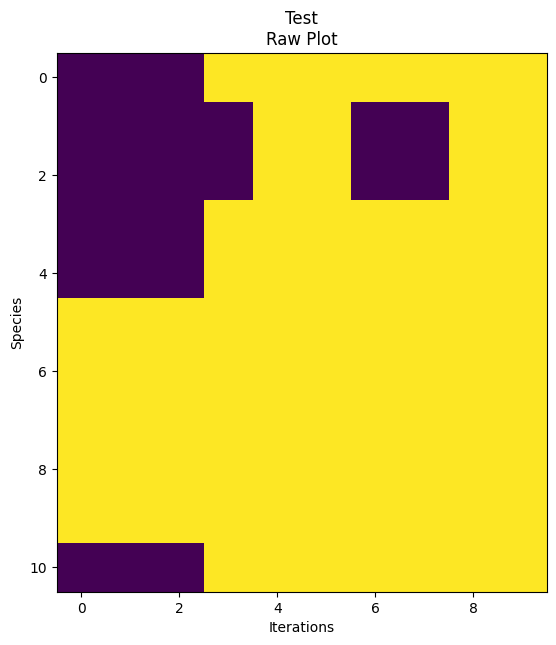

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotRawRw(axes, walk_type='simple',walk_index=1, abstraction_type='c', title="Test")
plt.show()

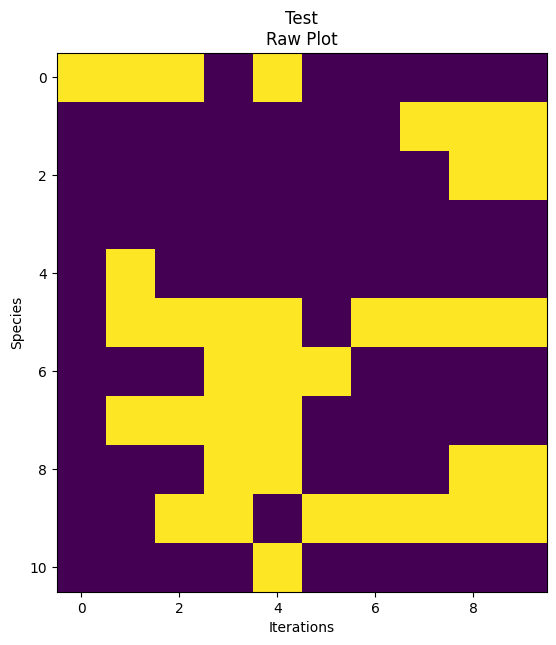

In [11]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotRawRw(axes, walk_type='mak',walk_index=1, abstraction_type='a', title="Test")
plt.show()

The folowing correspond to the evolutionary change of random walk, recives the same arguments as the latter, but whit added plot options (`show_indices, index_spacing` and `legend`) 

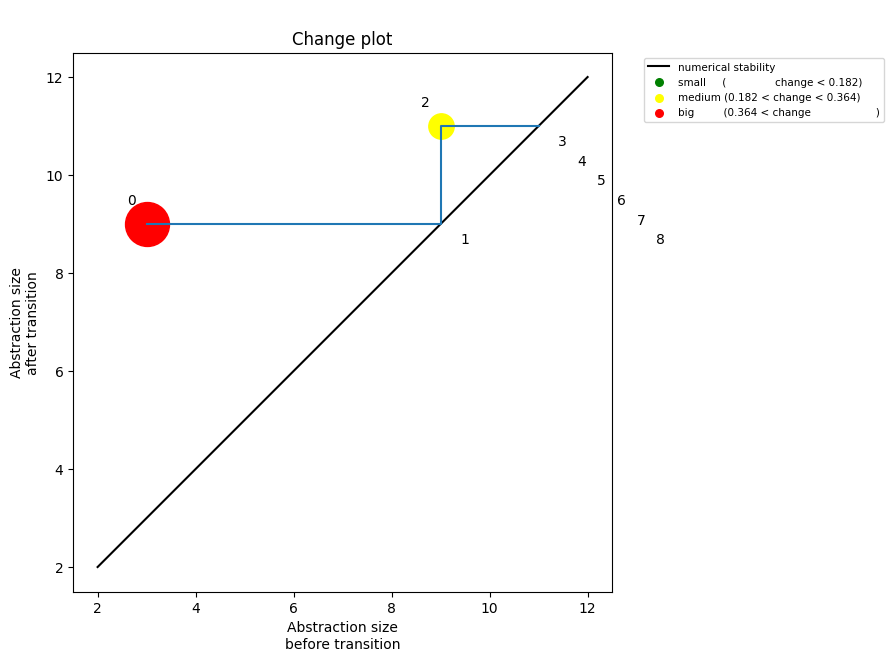

In [12]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotChangeRw(axes, walk_type='simple',walk_index=0, abstraction_type='c', 
                   title='', show_indices=True, index_spacing=1, legend=True)
plt.show()

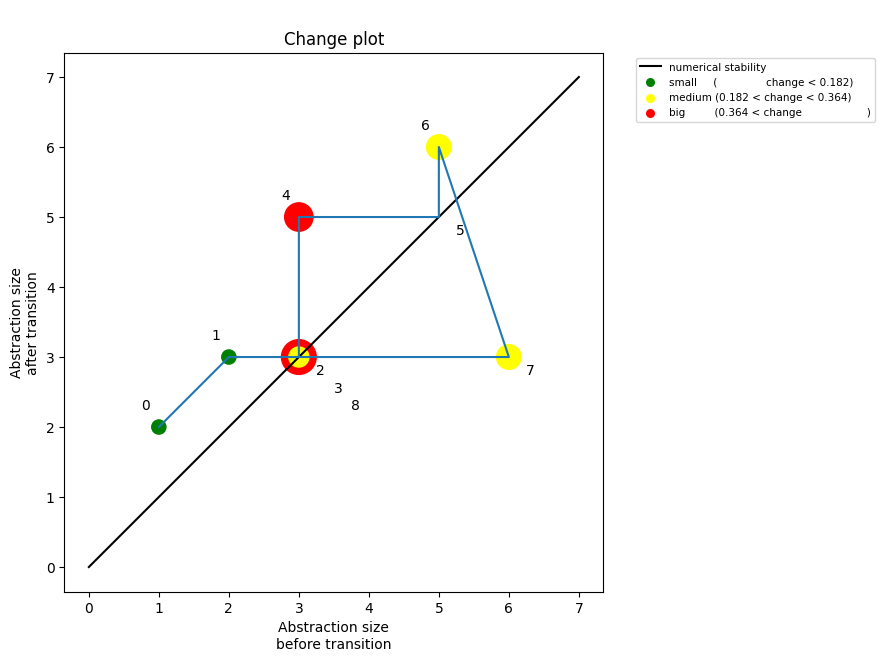

In [13]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)
RN.plotChangeRw(axes, walk_type='mak',walk_index=0, abstraction_type='a', 
                   title='', show_indices=True, index_spacing=1, legend=True)
plt.show()

Two plot for for the evolutionary trajectories are plotted. The first of these considers the possibility of plotting all repetitions of the random walks of the network. The second can plot the perturbations and their convergent states for a particular walk. The fist one recive similar arguments as the latter function, but here the variable `walk_indexes` correspond to a list of keys of the walks to plot, is this variable is `None` then the function will plot all of the walks. The `loga` change the scale to logaritmic.  

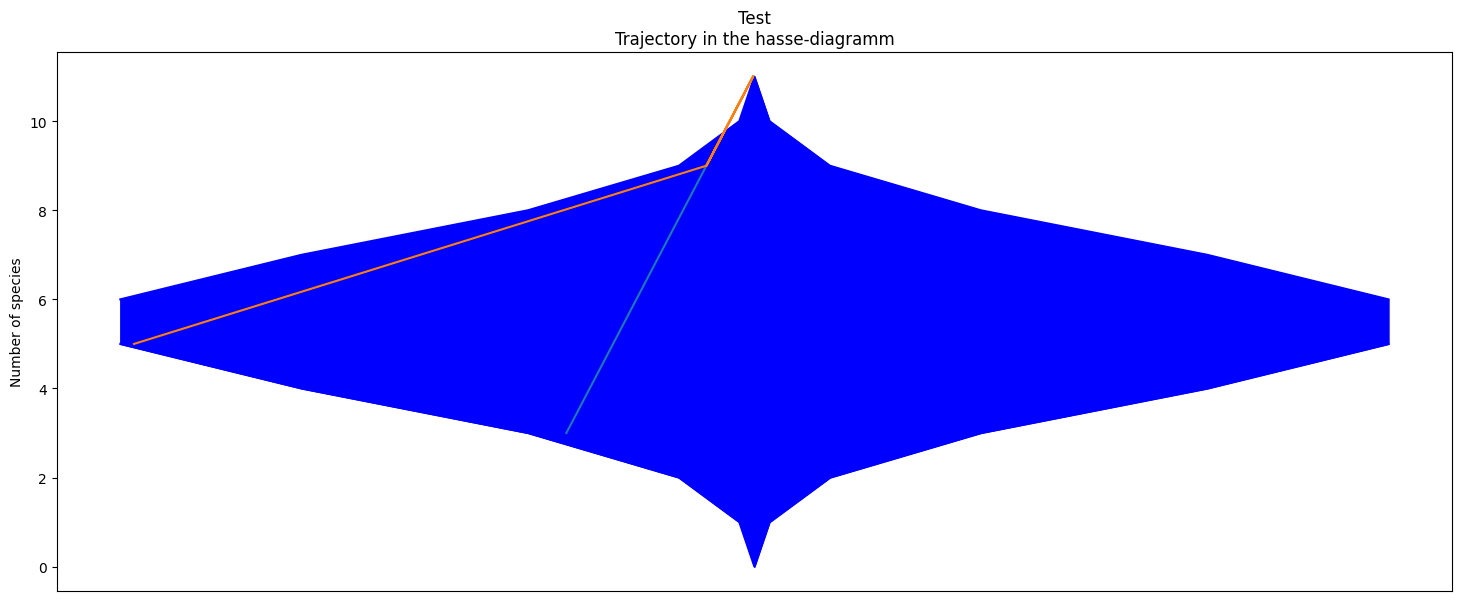

In [14]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseRw(axes, walk_type='simple', walk_indexes=None, abstraction_type='c', title='Test', loga=False)
 
plt.show()

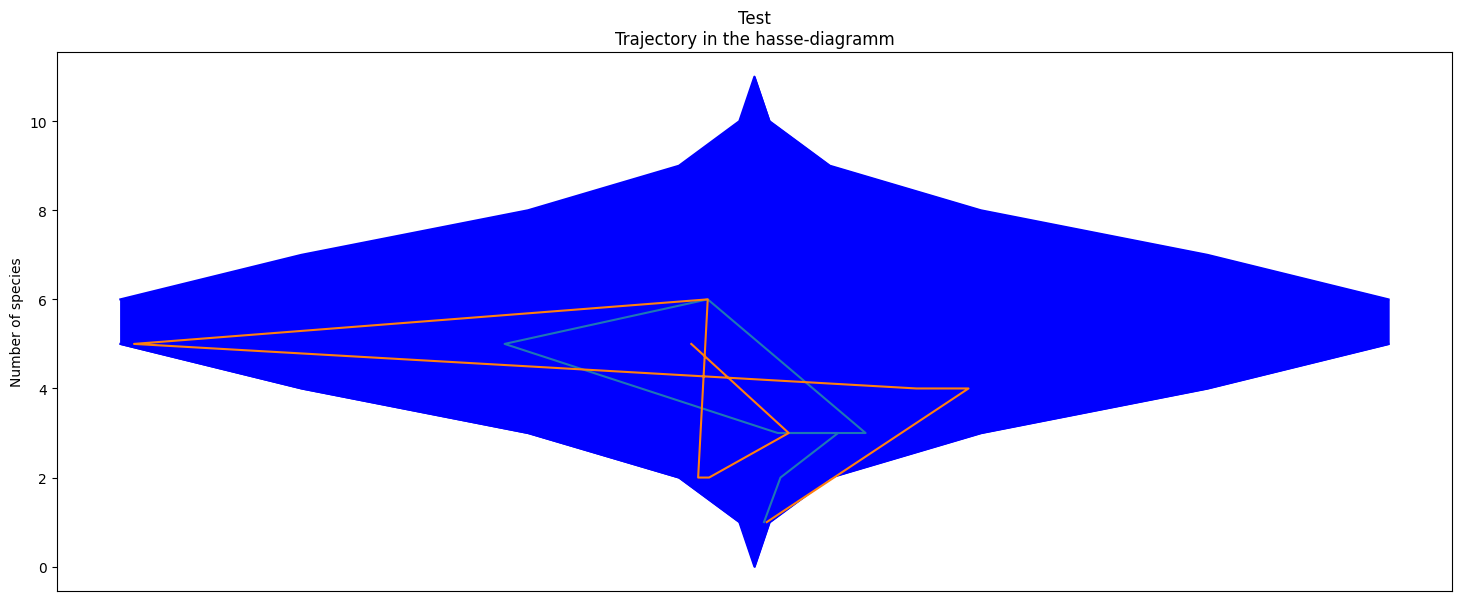

In [15]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseRw(axes, walk_type='mak', walk_indexes=None, abstraction_type='a', title='Test', loga=False)
 
plt.show()

As describe before, this function describe a specific random walk considering the convergent and perturbed steps. Here again the `walk_index` variable correspond to the key of the random walk to be ploted.

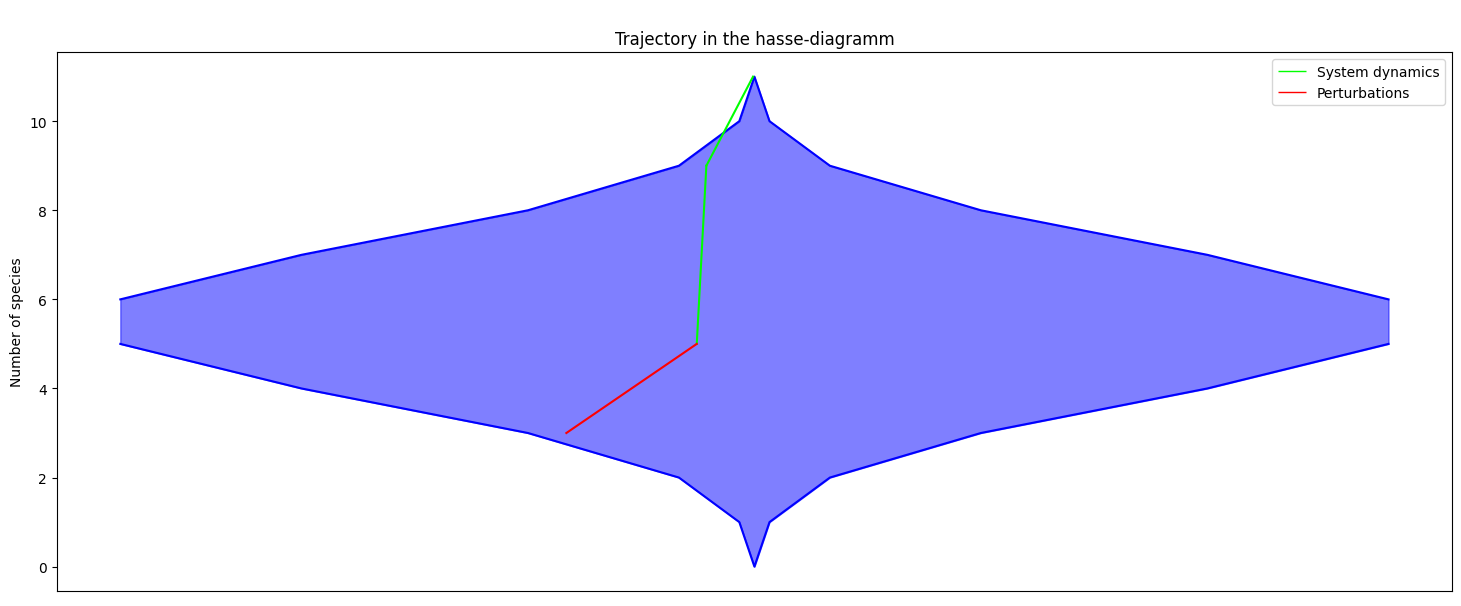

In [16]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseConvergenceAndPerturbationRw(axes,walk_type='simple', walk_index=0,  
                                              convergent_abstraction_type='c',
                                              title='', loga=False)
plt.show()

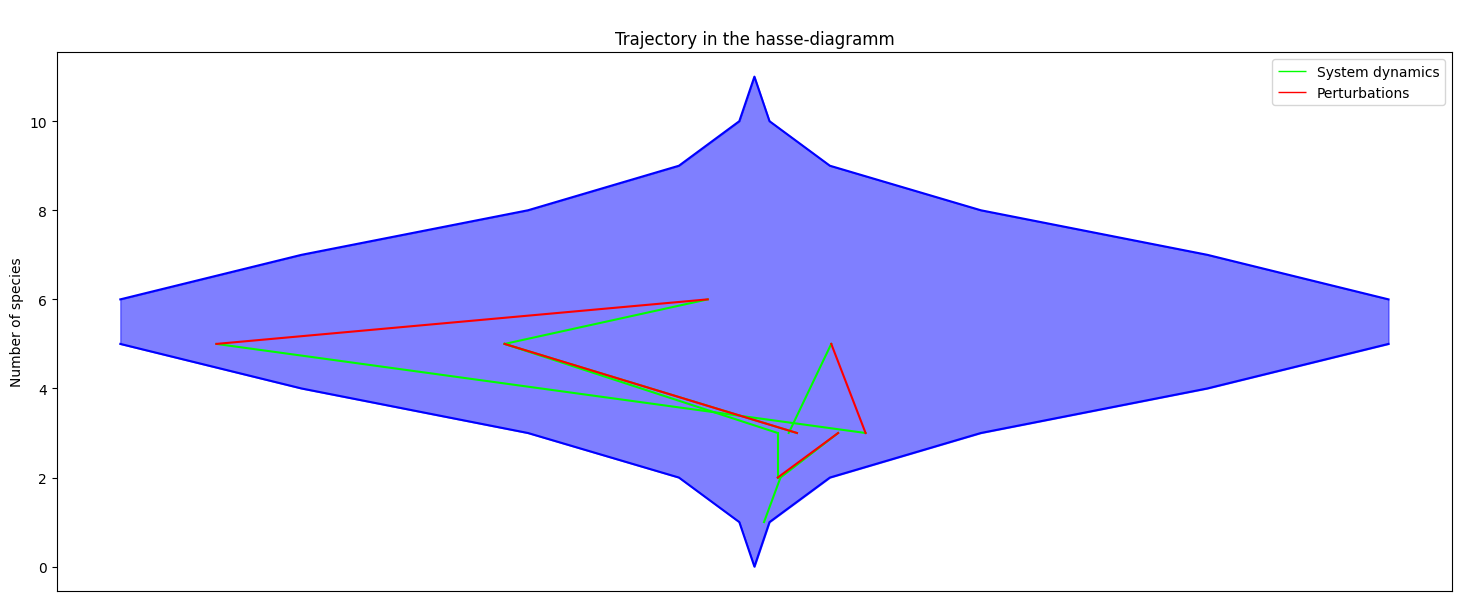

In [17]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHasseConvergenceAndPerturbationRw(axes,walk_type='mak', walk_index=0,  
                                              convergent_abstraction_type='a',
                                              title='', loga=False)
plt.show()

It is also possible to obtain datraframes with resilience measures of the simulated random walks, by means of the function `getAbstrationTransitionDf`. This function receives the same arguments as the previous functions plus the complexity identification key `complexity_type`. Two dataframes are obtained, one with the abstraction data and their resilient properties, and the other with the transitions. 

In [19]:
simple_abst_df,simple_trans_df= RN.getAbstrationTransitionDf(walk_type='simple',walk_indexes=None,
                                                             abstraction_type='c',complexity_type='cc')

In [20]:
simple_abst_df

,abstraction,initial_distribution,n_species,complexity,reachability,maintainability,strict_maintainability
0,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]",0.5,3,1.0,0,0.000000e+00,0.000000
1,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]",0.5,5,2.0,0,5.372290e-12,0.666667
2,"[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]",0.0,9,4.0,1,1.562500e-01,0.400000
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0.0,11,6.0,2,8.437500e-01,0.888889


In [21]:
simple_trans_df

,a2,a1,a_1,a_2,counts,probability,change_local,change_global,change_complexity
0,0,2,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]",1,1.000000,0.666667,0.545455,-3.0
1,2,2,"[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]",2,0.400000,0.000000,0.000000,0.0
2,2,3,"[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",3,0.600000,0.181818,0.181818,-2.0
3,3,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",8,0.888889,0.000000,0.000000,0.0
4,1,1,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]",2,0.666667,0.000000,0.000000,0.0
5,1,2,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]",1,0.333333,0.444444,0.363636,-2.0
6,3,2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]",1,0.111111,0.181818,0.181818,2.0


In [22]:
mak_abst_df, mak_trans_df= RN.getAbstrationTransitionDf(walk_type='mak',walk_indexes=None,
                                                        abstraction_type='a',complexity_type='ca')

In [23]:
mak_abst_df

,abstraction,initial_distribution,n_species,complexity,reachability,maintainability,strict_maintainability
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.5,1,0.142857,0,0.000000e+00,0.0
1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.5,1,0.500000,0,0.000000e+00,0.0
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]",0.0,2,1.476190,1,0.000000e+00,0.0
3,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]",0.0,2,1.369048,3,0.000000e+00,0.0
4,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]",0.0,2,1.559524,3,0.000000e+00,0.0
5,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]",0.0,3,2.011905,3,0.000000e+00,0.0
6,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]",0.0,3,1.869048,2,5.421011e-20,0.5
7,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",0.0,3,2.059524,3,0.000000e+00,0.0
8,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]",0.0,3,1.976190,2,0.000000e+00,0.0
9,"[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]",0.0,4,2.678571,2,0.000000e+00,0.0


In [24]:
mak_trans_df

,a2,a1,a_1,a_2,counts,probability,change_local,change_global,change_complexity
0,1,2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1,1.0,0.500000,0.090909,-0.976190
1,2,8,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]",1,1.0,0.333333,0.090909,-0.500000
2,8,6,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]",1,1.0,0.500000,0.181818,0.107143
3,6,6,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]","[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]",1,0.5,0.000000,0.000000,0.000000
4,6,12,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]","[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0]",1,0.5,0.666667,0.363636,-1.333333
5,12,12,"[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0]","[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0]",1,0.5,0.000000,0.000000,0.000000
6,12,14,"[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1]",1,0.5,0.428571,0.272727,-0.535714
7,14,5,"[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]",1,0.5,0.500000,0.272727,1.726190
8,5,7,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]","[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",1,1.0,1.000000,0.545455,-0.047619
9,0,10,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]",1,1.0,0.750000,0.272727,-1.702381


The following function plots all the Markovian probabilities of a simple random walk. The input parameters correspond to same as the latter functions but two more parameters are added: 
- `save`, (boolean), if `True`: Stores the dataframes in the same directory as the input file
- `file_path`(string), path were dataframes are to be stored

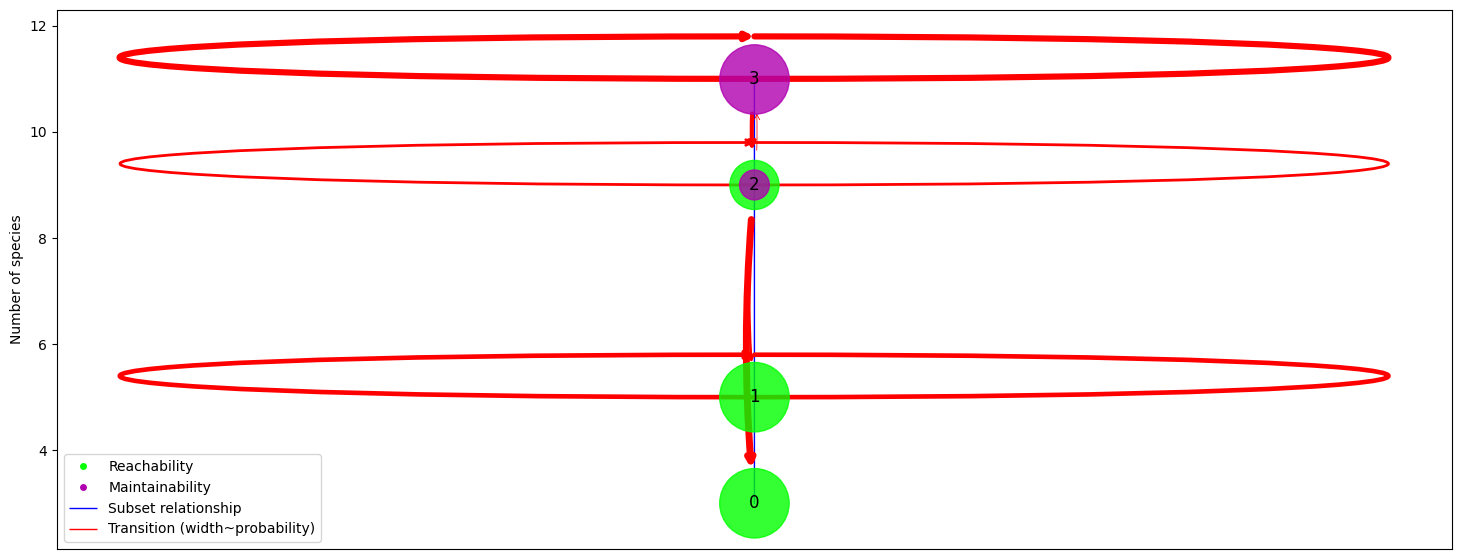

In [25]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotMarkovRw(axes,walk_type='simple', walk_indexes=None, abstraction_type='c',complexity_type='cc')
plt.show()

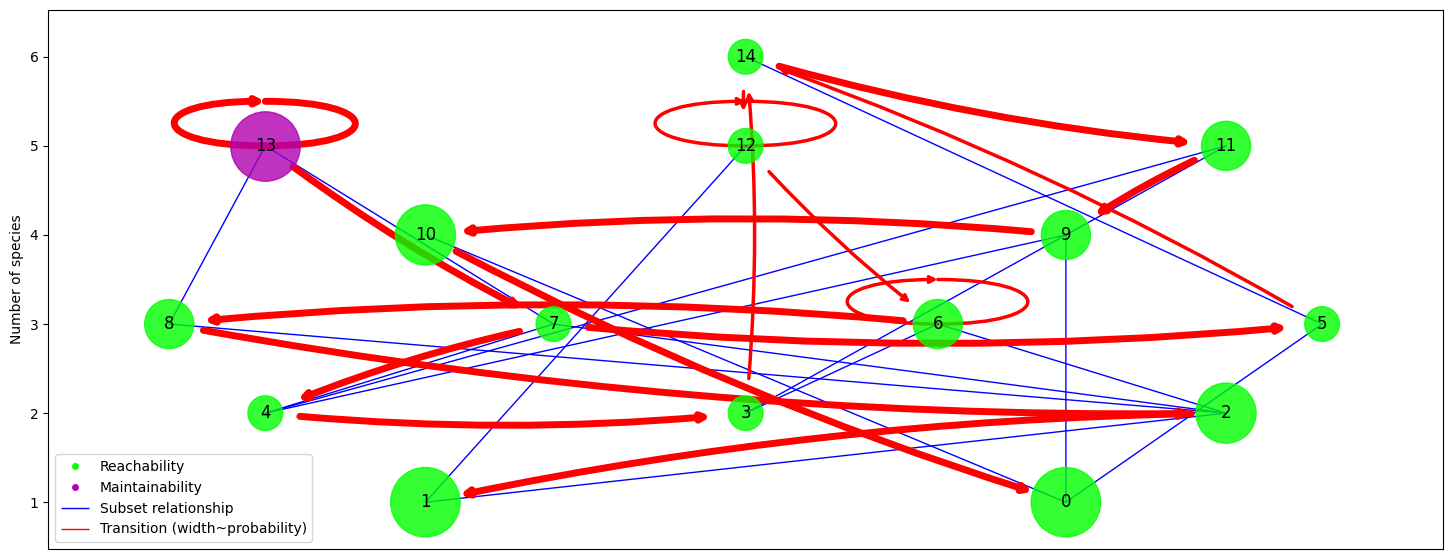

In [26]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotMarkovRw(axes,walk_type='mak', walk_indexes=None, abstraction_type='a',complexity_type='ca')
plt.show()

We can also plot the histogram of abstractions of simple random walks. Parameters goes same as berfore.

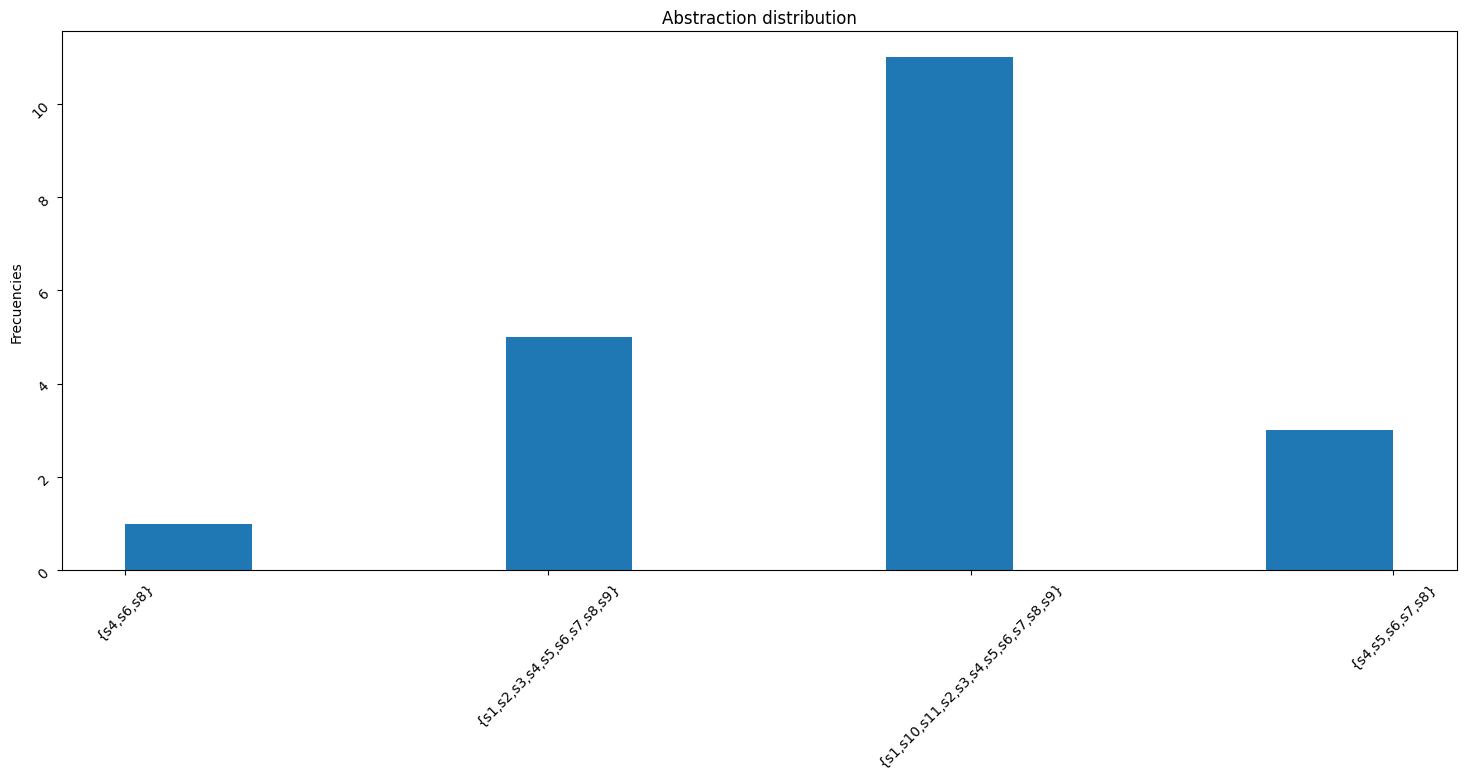

In [27]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHistAbstRw(axes, walk_type='simple', walk_indexes=None, abstraction_type='c')
plt.show()

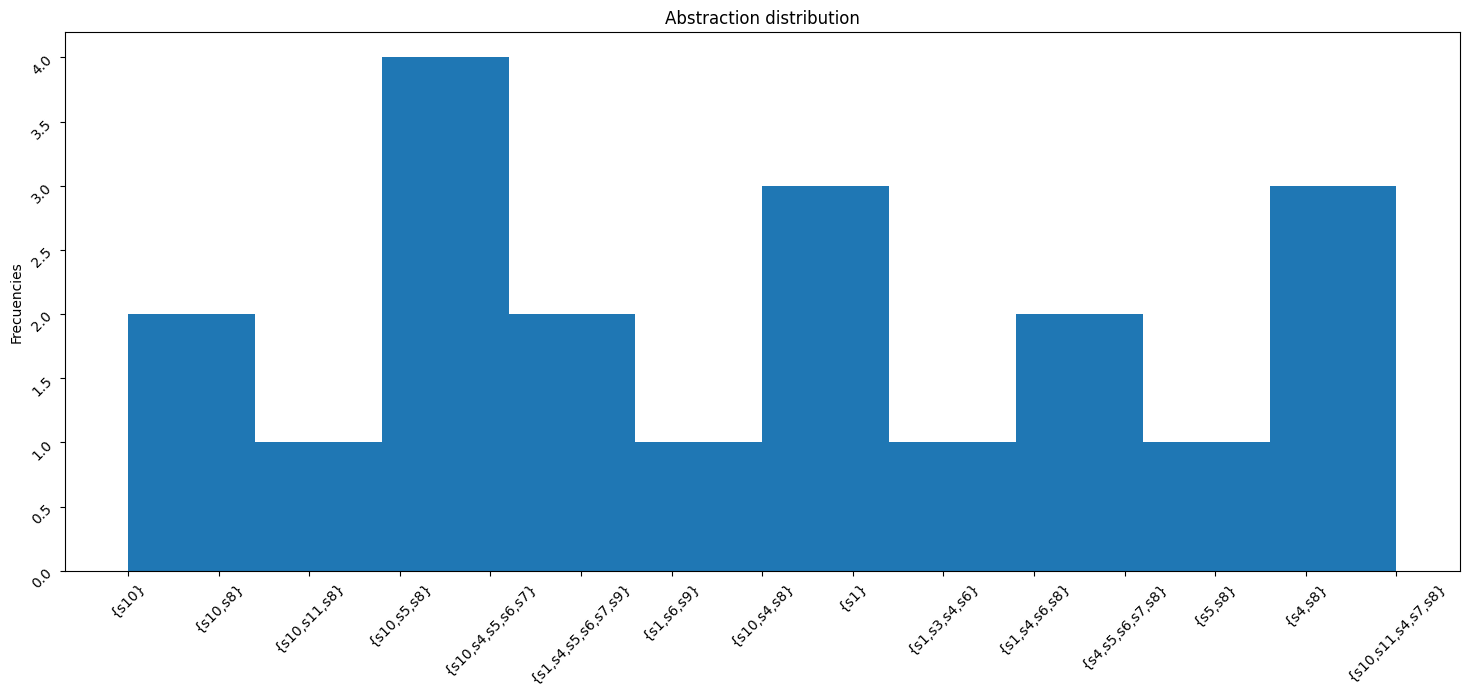

In [28]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotHistAbstRw(axes, walk_type='mak', walk_indexes=None, abstraction_type='a')
plt.show()

Like the `RN.plotChangeSimpleRw` function, the evolution of the simple random walk can be plotted, in terms of its contraction and growth, but in this case, considering its complexity. This function receives same parameters as before functios, plus the following inputs:

- `save` (boolean), if True: Stores the dataframes in the same directory as the input file
- `file_path` (string),  path were dataframes are to be stored
- `show_indices` (boolean), chooses if indices of transitions will be displayed
- `index_spacing` (float), modifies spacing between indices


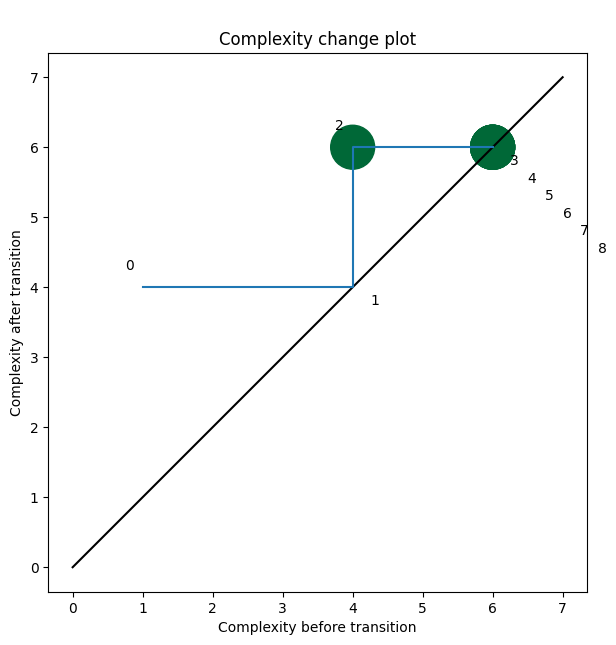

In [29]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotComplexityChangeRw(axes, walk_type='simple', walk_index=0, 
                               abstraction_type='c', complexity_type='cc', 
                               title='', show_indices=True, index_spacing=1, legend=True)
plt.show()

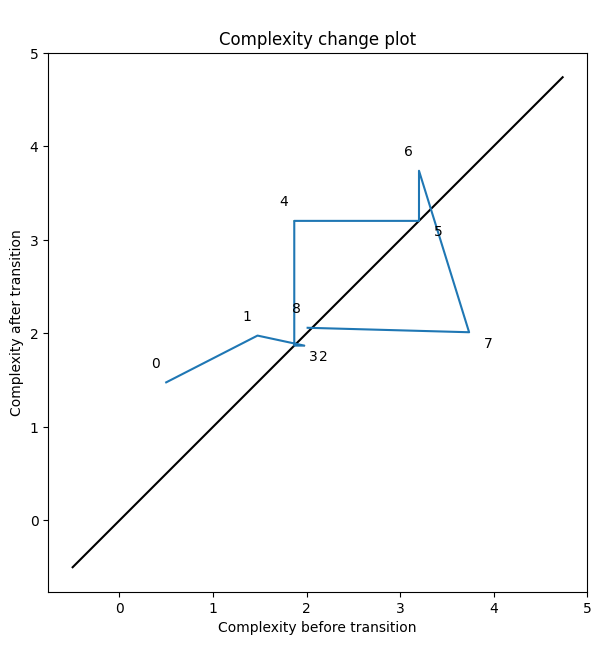

In [30]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 7)

RN.plotComplexityChangeRw(axes, walk_type='mak', walk_index=0, 
                               abstraction_type='a', complexity_type='ca', 
                               title='', show_indices=True, index_spacing=1, legend=True)
plt.show()